# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Wayan Devi Pratiwi
- **Email:** pratiwidevii061@gmail.com
- **ID Dicoding:** devipratiwii

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penggunaan sepeda berdasarkan jenis hari (weekend vs weekday)?
- Apakah cuaca mempengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda (total 'count') setiap bulan pada tahun 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca file csv "day.csv" dan menampilkan beberapa baris pertama dari dataset
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca file csv "hour.csv" dan menampilkan beberapa baris pertama dari dataset
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Ada satu kolom dengan tipe data yang kurang tepat sesuai dengan hasil di atas. Kolom yang perlu diperbaiki adalah: dteday dengan tipe data yang benar adalah datetime.

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Berdasarkan hasil di atas, tabel day_df tidak terdapat missing values.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Mengecek nilai statistik kolom numerik di 'day_df'
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ada satu kolom dengan tipe data yang kurang tepat sesuai dengan hasil di atas. Kolom yang perlu diperbaiki adalah: dteday dengan tipe data yang benar adalah datetime.

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Berdasarkan hasil di atas, tidak terdapat missing values pada tabel hour_df

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Mengecek nilai  statistik kolom numerik di 'hour_df'
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
# Menghapus kolom 'instant' dari day_df dan hour_df
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [13]:
# Mengonversi kolom 'dteday' menjadi tipe datetime di day_df dan hour_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [15]:
# Mengonversi tipe data integer menjadi kategori pada beberapa kolom 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit'
kolom_kategori = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for kolom in kolom_kategori:
    day_df[kolom] = day_df[kolom].astype("category")
    hour_df[kolom] = hour_df[kolom].astype("category")

# Menampilkan tipe data yang telah diperbarui untuk memastikan perubahan
print(day_df.dtypes[kolom_kategori])
print(hour_df.dtypes[kolom_kategori])

season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object
season        category
mnth          category
holiday       category
weekday       category
weathersit    category
dtype: object


In [16]:
# Menyesuaikan nama kolom di dataset hour_df agar lebih jelas
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [17]:
# Menyesuaikan nama kolom di dataset day_df agar lebih jelas
day_df.rename(columns={
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
}, inplace=True)

In [19]:
# Mengubah kolom 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].astype('category').cat.rename_categories(month_mapping)
hour_df['month'] = hour_df['month'].astype('category').cat.rename_categories(month_mapping)

# Mengubah kolom 'weekday' menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)
hour_df['weekday'] = hour_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)

# Mengubah nilai pada kolom 'year' menjadi: 0:2011, 1:2012
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].astype('category').cat.rename_categories(year_mapping)
hour_df['year'] = hour_df['year'].astype('category').cat.rename_categories(year_mapping)

# Mengubah kolom 'season' menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].astype('category').cat.rename_categories(season_mapping)
hour_df['season'] = hour_df['season'].astype('category').cat.rename_categories(season_mapping)


In [20]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

# Menampilkan 5 baris pertama dari DataFrame 'hour_df' untuk melihat perubahan
print(hour_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0                 2  0.344167  0.363625  0.805833   0.160446     331   
1                 2  0.363478  0.353739  0.696087   0.248539     131   
2                 1  0.196364  0.189405  0.437273   0.248309     120   
3                 1  0.200000  0.212122  0.590435   0.160296     108   
4                 1  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  
      dteday  season  year

In [21]:
# Mengubah kolom 'weather_situation' menjadi: 1:Clear, 2:Misty, 3:LightRain/Snow, 4:HeavyRain/Snow
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'LightRain/Snow', 4: 'HeavyRain/Snow'}

# Pastikan kolom 'weather_situation' adalah kategori sebelum melakukan rename_categories
day_df['weather_situation'] = day_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)


In [22]:
# Menampilkan 5 baris pertama dari DataFrame 'day_df' untuk melihat perubahan
print(day_df.head())

      dteday  season  year month holiday    weekday  workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday           0   
1 2011-01-02  Spring  2011   Jan       0     Sunday           0   
2 2011-01-03  Spring  2011   Jan       0     Monday           1   
3 2011-01-04  Spring  2011   Jan       0    Tuesday           1   
4 2011-01-05  Spring  2011   Jan       0  Wednesday           1   

  weather_situation      temp     atemp       hum  windspeed  casual  \
0             Misty  0.344167  0.363625  0.805833   0.160446     331   
1             Misty  0.363478  0.353739  0.696087   0.248539     131   
2             Clear  0.196364  0.189405  0.437273   0.248309     120   
3             Clear  0.200000  0.212122  0.590435   0.160296     108   
4             Clear  0.226957  0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600  


Pada cleaning data di atas telah dilakukan:
- Menghapus kolom instant
- Tipe data kolom dteday telah berhasil diubah menjadi datetime.
- Tipe data int pada kolom season, mnth, holiday, weekday, workingday, dan weathersit sekarang telah beralih menjadi category.
- Perubahan nama pada beberapa kolom agar lebih mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [24]:
# Mengelompokkan 'weather_situation' dan menghitung agregat 'count'
result = day_df.groupby(by='weather_situation', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

print(result)

                  count                           
                    max  min         mean      sum
weather_situation                                 
Clear              8714  431  4876.786177  2257952
Misty              8362  605  4035.862348   996858
LightRain/Snow     4639   22  1803.285714    37869


Berdasarkan hasil di atas menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada cuaca cerah (clear) dengan rata-rata 4.876 penyewaan per hari dan total 2.257.952 penyewaan. Pada cuaca berkabut (misty), rata-rata turun menjadi 4.035, sedangkan hujan ringan atau salju (light rain/snow) memiliki rata-rata terendah, 1.803 penyewaan. Sehingga, penyewaan sepeda lebih tinggi saat cuaca baik dan menurun saat cuaca memburuk

In [25]:
# Mengelompokkan 'weekday' dan menghitung agregat 'count'
result = day_df.groupby(by='weekday', observed=True).agg({
    'count': ['max', 'min', 'mean']
})

print(result)

          count                   
            max   min         mean
weekday                           
Sunday     8227   605  4228.828571
Monday     7525    22  4338.123810
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462
Thursday   7804   431  4667.259615
Friday     8362  1167  4690.288462
Saturday   8714   627  4550.542857


Berdasarkan hasil di atas, penyewaan sepeda tertinggi terjadi pada hari Sabtu (maksimum 8.714), sementara penyewaan terendah terjadi pada hari Senin (minimum 22). Rata-rata penyewaan tertinggi terjadi pada hari Jumat (4.690), sedangkan rata-rata terendah pada hari Minggu (4.228).

## Visualization & Explanatory Analysis

- Bagaimana perbandingan penggunaan sepeda berdasarkan jenis hari (weekend vs weekday)?
- Bagaimana distribusi jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda (total 'count') setiap bulan pada tahun 2012?

### Pertanyaan 1: Bagaimana perbandingan penggunaan sepeda berdasarkan jenis hari (weekend vs weekday)?

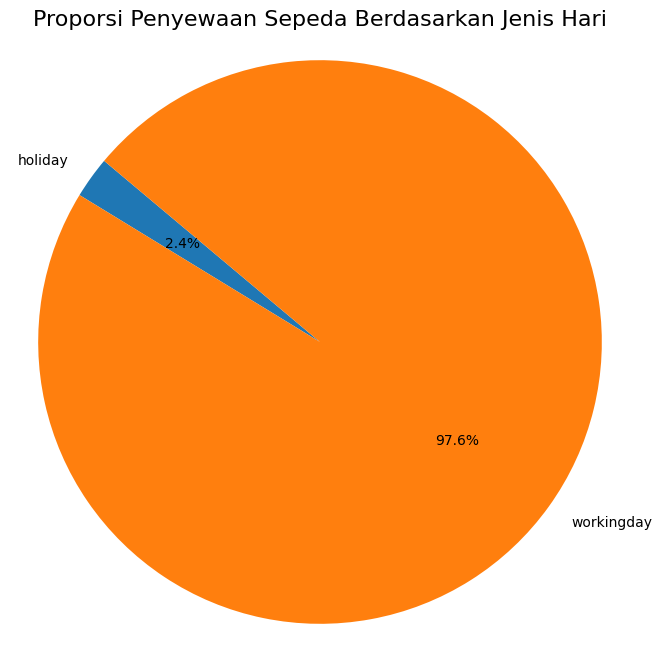

In [28]:
# Membuat kolom 'day_type' untuk membedakan antara hari kerja dan hari libur
day_df['day_type'] = day_df.apply(lambda row: 'holiday' if row['holiday'] == 1 else 'workingday', axis=1)

# Menghitung total penggunaan sepeda berdasarkan jenis hari
rentals_by_day_type = day_df.groupby('day_type').agg({'count': 'sum'}).reset_index()

# Plot menggunakan pie chart untuk menunjukkan proporsi penggunaan sepeda
plt.figure(figsize=(8, 8))
plt.pie(rentals_by_day_type['count'], labels=rentals_by_day_type['day_type'], autopct='%1.1f%%', startangle=140)

# Memberikan judul
plt.title('Proporsi Penyewaan Sepeda Berdasarkan Jenis Hari', fontsize=16)

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan hasil visualisasi di atas, penggunaan sepeda jauh lebih tinggi pada hari kerja (97.6%) dibandingkan hari libur (2.4%). Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda untuk keperluan transportasi di hari kerja, sedangkan hari libur memiliki potensi yang belum dimanfaatkan.

### Pertanyaan 2: Apakah cuaca mempengaruhi jumlah penyewaan sepeda?


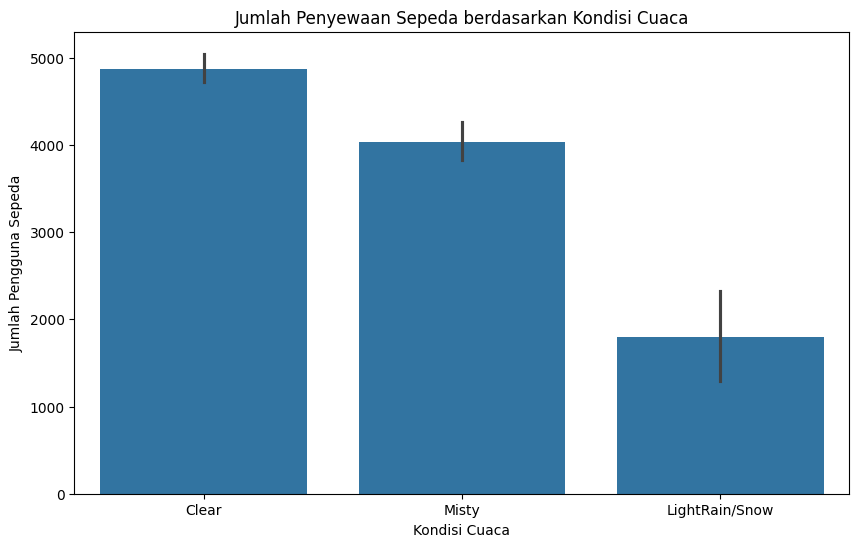

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_situation',
    y='count',
    data=day_df)

plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan hasil visualisasi di atas menunjukkan bahwa peminjaman dan penggunaan sepeda tertinggi terjadi saat cuaca cerah, menurun saat berkabut, dan paling rendah pada cuaca hujan ringan atau bersalju. Cuaca yang lebih baik cenderung mendorong lebih banyak orang untuk menggunakan sepeda.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda (total 'count') setiap bulan pada tahun 2012?

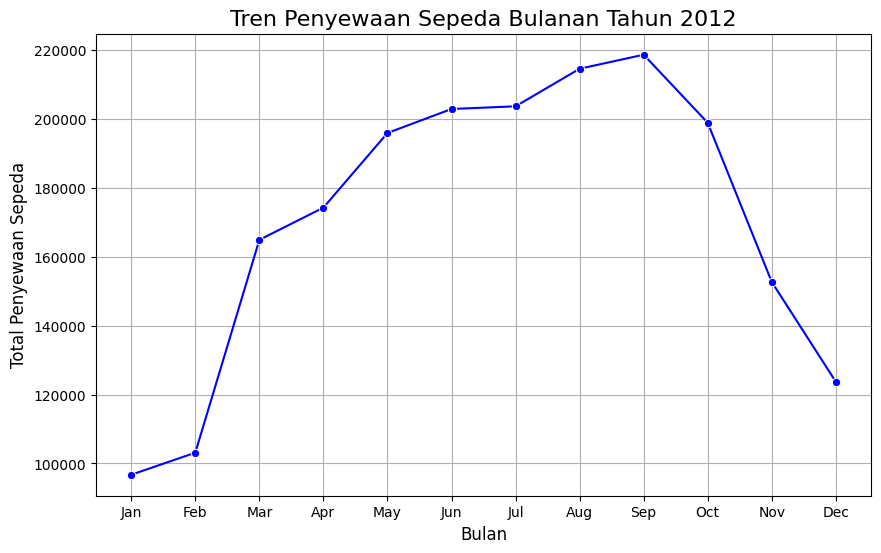

In [30]:
# Filter data untuk tahun 2012
day_df_2012 = day_df[day_df['year'] == '2012']

# Mengelompokkan data berdasarkan bulan dan menghitung total 'count' (penggunaan sepeda), dengan observed=False
monthly_rentals_2011 = day_df_2012.groupby('month', observed=False).agg({'count': 'sum'}).reset_index()

# Plot menggunakan lineplot untuk melihat tren penggunaan sepeda tiap bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', data=monthly_rentals_2011, marker='o', color='b')

# Memberikan judul dan label sumbu
plt.title('Tren Penyewaan Sepeda Bulanan Tahun 2012', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)

# Memberikan label nama bulan
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, 12), labels=month_names)

# Menampilkan plot
plt.grid(True)
plt.show()

Berdasarkan hasil visualisasi di atas, menunjukkan bahwa penyewaan meningkat signifikan hingga Agustus, mencapai puncaknya pada bulan tersebut, kemudian mengalami penurunan tajam hingga Desember, mencerminkan pola musiman dalam penggunaan sepeda.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan hasil visualisasi menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja (weekday) dibandingkan dengan hari libur (holiday). Hal ini mengindikasikan bahwa sepeda lebih banyak digunakan sebagai sarana transportasi pada hari kerja, sementara potensi penggunaannya pada akhir pekan masih perlu ditingkatkan.
- Conclution pertanyaan 2: Berdasarkan hasil analisis didapatkan hasil bahwa kondisi cuaca memiliki dampak yang signifikan terhadap jumlah peminjaman sepeda. Semakin baik cuacanya, seperti saat cuaca cerah, semakin tinggi tingkat penggunaan sepeda. Sebaliknya, kondisi cuaca buruk seperti hujan ringan atau salju cenderung menurunkan penyewaan dan penggunaan sepeda.
- Conclution pertanyaan 3: Berdasarkan hasil visualisasi tren penggunaan sepeda setiap bulan pada tahun 2012 menunjukkan peningkatan signifikan dari Januari hingga Agustus, dengan puncak penyewaan terjadi pada bulan Agustus, diikuti oleh penurunan jumlah penyewaan pada bulan-bulan berikutnya hingga Desember.

## Analisis Lanjutan

**RFM Analysis**

- Recency: Mengukur waktu sejak pelanggan terakhir bertransaksi; nilai yang lebih kecil menunjukkan interaksi yang lebih baru.

- Frequency: Menghitung jumlah transaksi pelanggan dalam periode tertentu; frekuensi tinggi menandakan loyalitas.

- Monetary: Mengukur total pengeluaran pelanggan; nilai tinggi menunjukkan kontribusi finansial yang signifikan.

In [34]:
# Menghitung Recency, Frequency, dan Monetary
current_date = day_df['dteday'].max()

# Menggunakan kolom 'registered' untuk analisis RFM
rfm_df = day_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'count': 'sum'  # Total penyewaan sebagai Monetary
}).reset_index()

# Menghitung Frequency
rfm_df['Frequency'] = day_df.groupby('registered')['dteday'].count().values

# Mengganti nama kolom
rfm_df.columns = ['Registered', 'Recency', 'Monetary', 'Frequency']

# Menampilkan hasil
print(rfm_df)

     Registered  Recency  Monetary  Frequency
0            20       63        22          1
1           416      704       431          1
2           432        5       441          1
3           451      372       754          1
4           472      705       506          1
..          ...      ...       ...        ...
674        6844       89      7572          1
675        6898       68      7693          1
676        6911       82      7691          1
677        6917      101      8167          1
678        6946       96      7733          1

[679 rows x 4 columns]


Hasil analisis RFM menunjukkan bahwa banyak pengguna terdaftar hanya melakukan satu penyewaan, dengan nilai Recency dan Monetary yang bervariasi. Pengguna dengan Recency rendah cenderung lebih aktif, sementara pengguna dengan Monetary tinggi menunjukkan potensi nilai bisnis yang tinggi.

In [39]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

all_df.to_csv("main_data.csv", index=False)